In [7]:
from uq_new import *
import pickle
import matplotlib.pyplot as plt
import numpy as np

Training memristor model
Initial parameters: phi1=5.527676105499268, phi3=1.7814456224441528, x_2=0.2826745808124542
Loss at step 1: 49.16950607299805
Loss at step 2: 49.14441680908203
Loss at step 3: 49.119422912597656
Loss at step 4: 49.09455490112305
Loss at step 5: 49.069740295410156
Loss at step 6: 49.0450553894043
Loss at step 7: 49.020450592041016
Loss at step 8: 48.995967864990234
Loss at step 9: 48.97154998779297
Loss at step 10: 48.947269439697266
Final loss: 48.947269439697266
Optimal parameters: phi1=5.49770450592041, phi3=1.8112887144088745, x_2=0.25297871232032776
Predictions: [0.0902213, 0.00864231, 0.032538027, 0.00020891105, 0.052739434, 0.08792313, 0.10560367, 0.004894763, 0.04100687, 0.08462613, 0.051090054, 0.036659848, 0.051612202, 0.004782588, 0.042573176, 0.020054955, 0.0029190932, 0.053143606, 0.0052102394, 0.103039294, 0.03243409, 0.02486889, 0.10267463, 0.11462509, 0.03825521, 0.07403554, 0.007346722, 0.0033160723, 0.00013987382, 0.0090064015, 0.06087727, 0.07

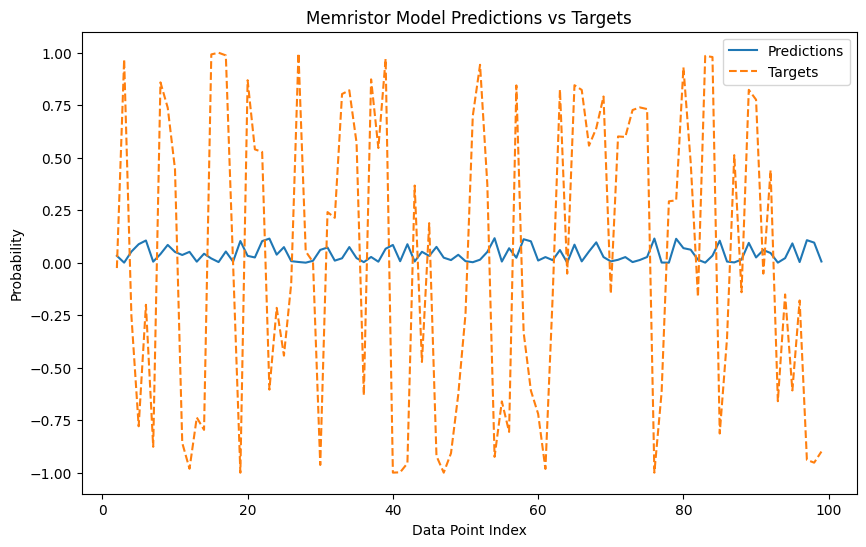

In [8]:

dip = 3  # Memory depth

# Input data
inp = np.random.random_sample(100) * 0.5  # Random values between 0 and 0.5
x_train = tf.constant(np.sqrt(inp), dtype=tf.float32)

# Train the memristor model
res_mem, phi1, phi3, x_2 = train_memristor(x_train, dip)

# Save training results
with open("results_mem_t_lag_iris.pkl", "wb") as file:
    pickle.dump(res_mem, file)

# Predict using the trained model
x_test = x_train  # For simplicity, using the same data
predictions, targets = predict_memristor(x_test, dip, phi1, phi3, x_2)

# Print predictions and targets
print("Predictions:", predictions)
print("Targets:", targets)

# Plotting
# Since targets and predictions start from index 2 (after phi >= 2), we adjust the x-axis accordingly
x_axis = np.arange(2, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(x_axis, predictions[2:], label='Predictions')
plt.plot(x_axis, targets, label='Targets', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Probability')
plt.title('Memristor Model Predictions vs Targets')
plt.legend()
plt.show()